For this simple implementation of the K-nn method, we will use the numpy and matplotlib libraries. Also, as we will be generating a synthetic dataset for better comprehension, we will use the make_blobs method from sklearn, wich will generate well defined and separated groups of information, to have a sure reference for our implementation.

In [28]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

So it's time to generate the data samples for this examples, the parameters of the make_blobs is the number of samples, the number of features, or dimensions, the quantity of centers or groups, if the samples have to be shuffled, and the standard deviation of the cluster, to control how disperse the group samples are.

[]

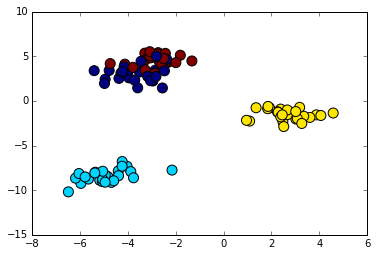

In [29]:
data, features = make_blobs(n_samples=100, n_features = 2, centers=4, shuffle=True, cluster_std=0.8)
fig, ax = plt.subplots()
ax.scatter(data.transpose()[0], data.transpose()[1], c=features,marker = 'o', s = 100 )
plt.plot()

Firstly, lets define our distance function, which will be necessary to find the neighbours of all the new elements. We basically provide one sample, and return the distance between the provided new element and all their counterparts.

In [30]:
def distance (sample, data):
    distances=np.zeros(len(data))
    for i in range(0,len(data)):
        dist=np.sqrt(sum(pow(np.subtract(sample,data[i]),2)))
        distances[i]=dist
    return distances

The add_sample function will receive a new 2D sample, the current dataset, and an array marking the group of the corresponding sample, (from 0 to 3 in this case).
In this case we use the argpartition to get the indices of the three closer neighbors of current newsample, and then we use them to extract a subset of the features array.
Then the bincount will throw the count of any of the different classes on that 3 element subset, and then with argmax, we will choose the index (in this case the class number) of the group with the most elements in that 2 element set.

In [31]:
def add_sample(newsample, data, features):
    distances=np.zeros((len(data),len(data[0])))
    #calculate the distance of the new sample and the current data
    distances = distance(newsample, data)
    closestneighbors = np.argpartition(distances, 3)[:3]
    closestgroups=features[closestneighbors]
    return np.argmax(np.bincount(closestgroups))

Then we define our main knn function, which takes the new data to be applied, and uses the original classified data, represented by the data and features parameters, to decide tne classes of the new elements.

In [32]:
def knn (newdata, data, features):
    for i in newdata:
        test=add_sample (i, data, features);
        features=np.append(features, [test],axis=0)
        data=np.append(data, [i],axis=0)
    return data,features

Then is time to kickstart the process, for this reason we define a set of new samples, in the range of-10, 10 on both the x and y dimensions, and we will call our knn routine with it

In [33]:
newsamples=np.random.rand(20,2)*20-8.
finaldata, finalfeatures=knn (newsamples, data, features)

Now its time to represent  the final results. First we will represent the initial samples, which are much more well formed than our random values, and then our final values, represented with an empty square (c=none), so thew will serve as marker of those samples

[]

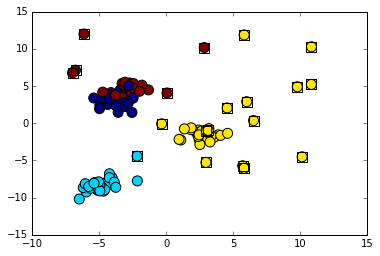

In [34]:
fig, ax = plt.subplots()
ax.scatter(finaldata.transpose()[0], finaldata.transpose()[1], c=finalfeatures,marker = 'o', s = 100 )
ax.scatter(newsamples.transpose()[0], newsamples.transpose()[1],c='none',marker = 's', s = 100 )
plt.plot()


In the graphic we can see how our simple model of 3 neighbours works well to qualify and reform the grouping as the process advances. As the figures show, the new groupings aren's necessarily of a circular form, they advance according with the way the incoming data progresses.